# Logistic Regression

---

## Brief:
In this notebook I will be implementing a logistic regression model using just numpy, that classifies a cancer patient's tumor as malignant or benign using multiple variable (Multivariate Logistic Regression).  
#### Goals:
- [Extracting Data](#data-extraction)
- [Defining Logistic Model](#logistic-regression-model)
- [Normalizing Data](#normalization-of-data)
- [Cost Function](#cost-function)
- [Gradient Descent](#gradient-descent)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Extraction
The dataset i'll be using is a very interesting one called **"Diagnostic Wisconsin Breast Cancer Database."**  
Which contains: <center>*"Features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass."*</center><center>*"They describe characteristics of the cell nuclei present in the image."*</center>

In breif, it's a datset that contains 33 features with the target value classifying a patient's tumor as "Malignent" or "Benign".  
Since the target array ${y}$ currently contains "M" for malignent and "B" for benign, we'll turn the array into boolean form with M = 1 and B = 0.  

Citation:
> 📊 **Dataset Reference**  
> Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). *Breast Cancer Wisconsin (Diagnostic)* [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B

In [16]:
# Extract data using pd.read_csv

x_raw, y_raw = pd.read_csv("wdbc.data", sep=',').drop(['ID', 'Diagnosis'], axis=1), pd.read_csv("wdbc.data", usecols=[1])
x_raw

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


As you can see, we successfully extracted the data into a ``x_raw`` variable. (Which contains elements of varying sizes, so normalization is needed. More on that in [Normalization of Data](#normalization-of-data))  
However, the ``y_raw`` variable contains letters as seen in this sample:  
| Index | Diagnosis |
|-------|-----------|
| 0     | M         |
| 1     | M         |
| 2     | M         |
| 3     | M         |
| 4     | M         |
| ...   | ...       |
| 564   | M         |
| 565   | M         |
| 566   | M         |
| 567   | M         |
| 568   | B         |

Therefore, we will convert the elements in the Diagnosis column into boolean values using ``numpy.where(condition, true then x, else y)``  Where <center>"M" = 1 || "B" = 0</center>

In [17]:
y = np.where(y_raw.values == "M", 1, 0).reshape(-1)
pd.DataFrame(y, columns=['Diagnosis'])

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## Logistic Regression Model

The logistic regression model, also known as the Binary Classification Model (since it outputs either 1 or 0 after applying a threshold), itself is a quite simple one, it takes *input* the linear model we're very used to, and plugs it's negative as the exponential's power.  
The logistic regression model is defined as:

$$
sigmoid(z) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

Where:
- ${z}$ is the linear model ${w \cdot x + b}$
- ${sigmoid()}$ is another name for the logistic model

And this results in a graph like such:  

<center><img src="1.webp" height="300" width="300"></center>

The logistic model calculates the **Probability**, it's hypothesis is: "What is the propability of it being 1 or 0". An example output of a logistic model could be something like 0.78, which would mean a 78% probability of the input x being classified as 1 or "True".
This is wonderful for **Binary Clasification**, as by simply setting a threshold (say, 0.5) the output of this model could is limited to 0 or 1. (more on this later)

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Normalization of Data

In this dataset, we have **30 features!!** Because of this, and especially since this is a logistic regression model, normalizing the data is a must.  
For this case, we will use *Z-Score Normalization*  
As before normalizing our features, their variation in size was large. But after normalization, they all vary from -1 to 1.  
- Before normalization: ``x[1] = [20.57   17.77   132.9   1326   0.08]`` (Some are small ``0.08`` and some are large ``1326``)
- After normalization: ``x[1] = [-0.181 -0.193  0.311  5.537 -0.271]`` (Same data, ranges from -1 to 1)

Z-score is defined as:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ is the original data point
- $\mu$ is the mean
- $\sigma$ is the deviation

In [50]:
def z_score(x):
    return (x - np.mean(x)) / np.std(x)

## Logarithmic Cost Function

The Logarthmic Cost Function, also known as **Binary Cross-Entropy** because of its use of boolean digits. This cost function is special to specific regression models such as Logistic Regression (This current model) and the RELU activation model (Rectified Linear Unit) since their outputs, after a threshold is put in place, is boolean.

The error for ${f(x)}$ if ${y = 1}$ is ${-\log(f(x))}$ Which results in the graph that shows the variation of cost according to ${f(x)}$ in document **(c)**. As you can see, as the output of the model deviates from the truth label ${y = 1}$ and approaches 0, the error outputted increased to the highest point being ${-\log(0)}$ (which is a math error so a very small ${\epsilon}$ is added)  
The logarithmic cost function strongly penalizes confident but incorrect predictions. For example, if the model predicts a very high probability for the wrong class, the cost will be high

The error for ${f(x)}$ if ${y = 0}$ is ${-\log(1 - f(x))}$ Which is shown in document **(b)**. Which also increases the cost the further you mvoe from the ground truth ${y}$


<center><img src="https://i.sstatic.net/ufmSH.png"></center>

So, in code, the Logarthmic Cost (Binary Cross-Entropy) is defined as:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Where:
- ${\hat{y}}$ is the model's prediction (1 or 0)
- ${y}$ is the ground truth label (1 or 0)
- ${m}$ is the number of training examples

Notes:
- A very small ${\epsilon}$ of ``1e-7`` is added to prevent the case of ${\log(0)}$, (which is a math error, very bad)


In [60]:
def cost(w, b, x, y):
    f_wb = sigmoid(x @ w + b) # Sigmoid function (calculates probability)
    epsilon = 1e-7
    f_wb = np.clip(f_wb, epsilon, 1 - epsilon) # Limits output of f_wb to prevent -log(0)
    err = y * np.log(f_wb + epsilon) + (1 - y) * np.log(1 - f_wb + epsilon)
    return -np.mean(err)

## Gradient Descent

Gradient descent for logistic regression does not differ much from linear regression, the only thing that differs is the way of calculating ${f(x)}$ (now that we are using the Sigmoid Function [Sigmoid Function](#logistic-regression-model))

So the gradient descent algorithm is defined as:


$$
w_j := w_j - \alpha \frac{\partial j(w,b)}{\partial w_j}
$$

$$
b := b - \alpha \frac{\partial j(w,b)}{\partial b}
$$

Where in linear regression, ${\frac{\partial j(w,b)}{\partial w_j}}$ is calculated using ${x \cdot w + b}$  
But now in logistic regression, that ${x \cdot w + b}$ is plugging into ${\frac{1}{1 + e^{-(w \cdot x + b)}}}$

Notes:
- ${j(w,b)}$ is the model error
- ${\alpha}$ is the learning rate alpha (usually a very small number ~ 0.01)

In [85]:
def calculate_gradient(w, b, x, y, alphar, itterations):
    err_arr = []
    for j in range(itterations):
        dj_dw = 0.
        dj_db = 0.
        for i in range(x.shape[0]):
            f_wb = sigmoid(x[i,:] @ w + b)
            f_wb = np.clip(f_wb, 1e-7, 1 - 1e-7)
            dj_dw += (f_wb - y[i]) * x[i]
            dj_db += (f_wb - y[i])
        w = w - alphar * (dj_dw / x.shape[0])
        b = b - alphar * (dj_db / x.shape[0])
        ## Ignore, for visualization purposes ##
        current_cost = cost(w, b, x, y)
        err_arr.append(current_cost)
        if j % 100 == 0: print(f"epoch {j} || Current Cost = {current_cost}")
        ## Ignore, for visualization purposes ##

    return w, b, err_arr


In [113]:
w = np.random.rand(30)
b = np.random.rand(1)
x = z_score(x_raw.values)
w, b, err_arr = calculate_gradient(w, b, x, y, 0.5, 5000)

epoch 0 || Current Cost = 0.3227144065732773
epoch 100 || Current Cost = 0.21374656331653663
epoch 200 || Current Cost = 0.1958659103755996
epoch 300 || Current Cost = 0.18726150136888844
epoch 400 || Current Cost = 0.18186513274462685
epoch 500 || Current Cost = 0.17805496036071097
epoch 600 || Current Cost = 0.17518554276640969
epoch 700 || Current Cost = 0.17293691884092185
epoch 800 || Current Cost = 0.17112632397926217
epoch 900 || Current Cost = 0.16963870974081088
epoch 1000 || Current Cost = 0.1683965511195969
epoch 1100 || Current Cost = 0.16734502341237234
epoch 1200 || Current Cost = 0.16644398399116736
epoch 1300 || Current Cost = 0.16566327896653713
epoch 1400 || Current Cost = 0.16497981423683572
epoch 1500 || Current Cost = 0.16437563166041105
epoch 1600 || Current Cost = 0.163836593600256
epoch 1700 || Current Cost = 0.16335145456477007
epoch 1800 || Current Cost = 0.16291118974295887
epoch 1900 || Current Cost = 0.16250849980401627
epoch 2000 || Current Cost = 0.162137

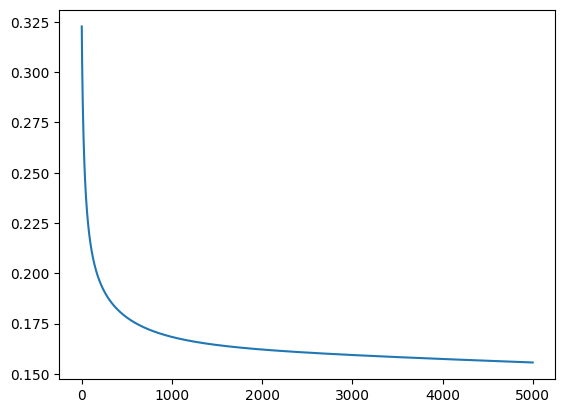

In [114]:
plt.plot(range(5000), err_arr)
plt.show()

## Final Chapter: Testing the trained model
Now that we've run gradient descent and made the binary classification model coverge, we'll put it up to the test!! 

We'll do two fun tests:
- Test the model on a patient to see if it classifies them correctly
- Measure how often does a model get it's classifications wrong

For the first patient, we'll log the information of their tumor

In [115]:
data_line = "842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189"
columns = [
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]
values = data_line.split(',')[2:]
df = pd.DataFrame([values], columns=columns)
df = df.astype(float)
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


The training data classified this patient's tumor as **Malignant**  
So would our model do the same?

In [116]:
model_prediction = sigmoid(df.values @ w + b)
if model_prediction > 0.5: 
    print(f"the model is {model_prediction * 100}% sure that the tumor is Malignant") 
else: print("The tumor is benign")

the model is [100.]% sure that the tumor is Malignant


Perfect!! Now we'll measure how many mistakes does the model make on the whole training set of 500+ patients.

In [121]:
model_error = 0
for i in range(x.shape[0]):
    f_wb = sigmoid(x[i,:] @ w + b)
    model_prediction = 1 if f_wb > 0.5 else 0
    if model_prediction != y[i]:
        model_error += 1

print(f"Out of {x.shape[0]} training examples, the model misclassified {model_error} of which")

Out of 569 training examples, the model misclassified 36 of which


Meaning that,  
In a training set of 569 **real breast cancer patients**, our binary classification model can classify a tumor as malignant or benight correctly **93.67%** of the time!! >:D

## Conclusion and ending

Thank you for reading this far into my nerdy little program, here we created a logistic regression model where we:
- Defined the logistic model with the ``sigmoid(z)`` function
- Normalized the data with the ``z_score(x)`` function
- Calculated the logarithmic / binary cross-entropy error using ``cost(w, b, x, y)``
- Trained and successfuly converged the model with ``compute_gradient(w, b, x, y, alphar, itterations)``

==> Written by Ziad Alezzi [Github](https://github.com/lucirie) [linkedin](https://www.linkedin.com/in/ziad-alezzi-8727bb345/)

#### This was logistic regression